In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df=pd.read_csv(r"D:\SampleDataset\Fish.csv")

In [7]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [15]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace=True)

In [16]:
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [17]:
df.isnull()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


In [68]:
df_sp=df['Species'].value_counts()
df_sp=pd.DataFrame(df_sp)
df_sp


,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


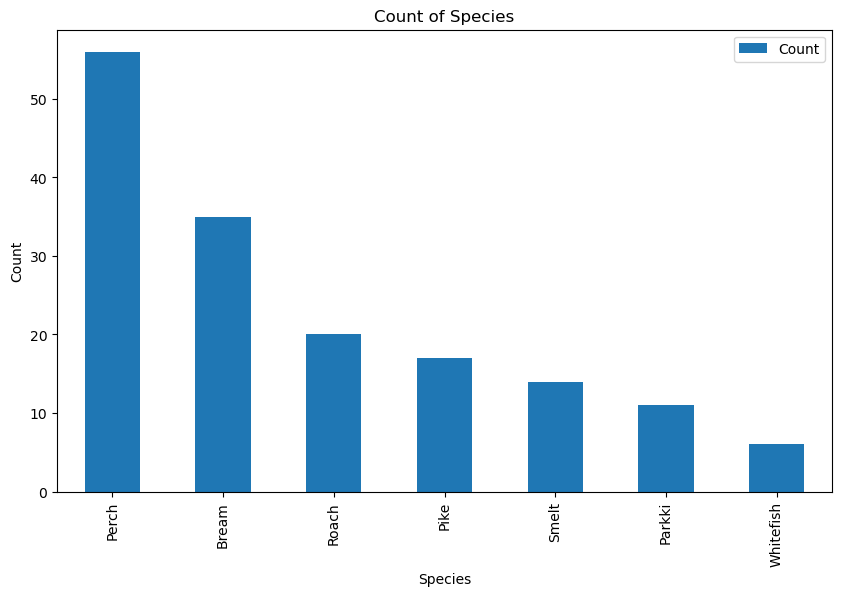

In [69]:
df_sp = df['Species'].value_counts().reset_index()
df_sp.columns = ['Species', 'Count']
df_sp.plot.bar(x='Species', y='Count', title='Count of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



In [70]:
df[df.Weight<=0]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [71]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [72]:
#df1=df1.drop('Species' ,axis=1)
df1

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [78]:
df1.corr(numeric_only=True)

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

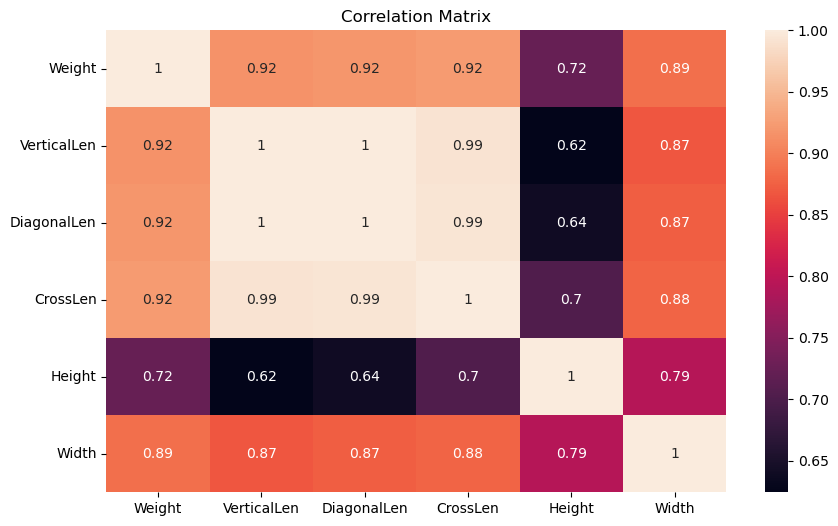

In [79]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [80]:
df2=df1.drop(['VerticalLen','DiagonalLen','CrossLen'], axis=1)
df2

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690
156,Smelt,12.2,2.2770,1.2558
157,Smelt,19.7,2.8728,2.0672


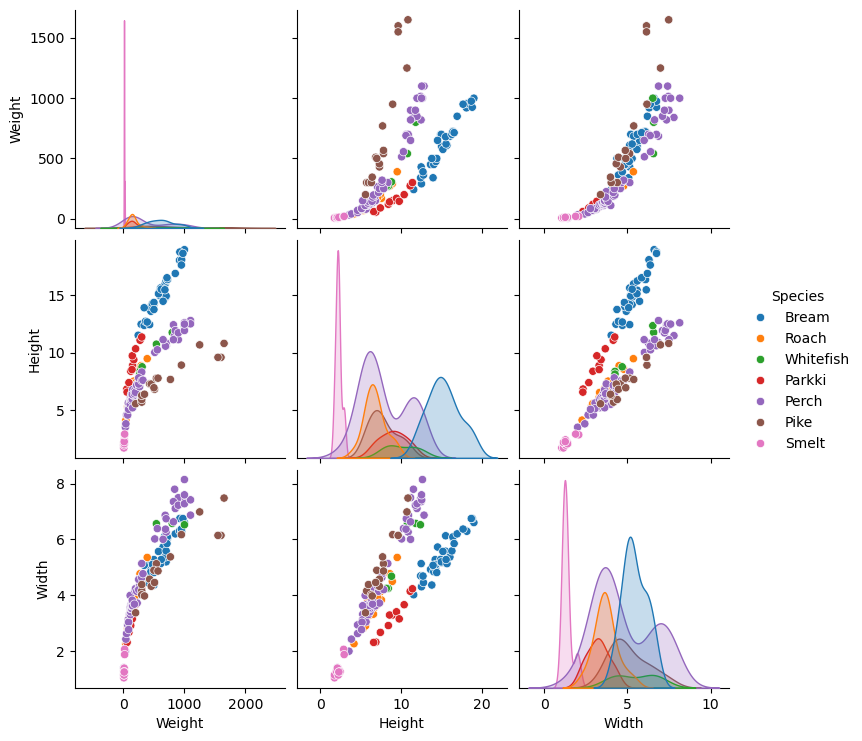

In [81]:
#Visualization using pairplot
sns.pairplot(df2, kind = 'scatter', hue = 'Species')


Text(0.5, 1.0, 'Outlier Detection based on Weight')

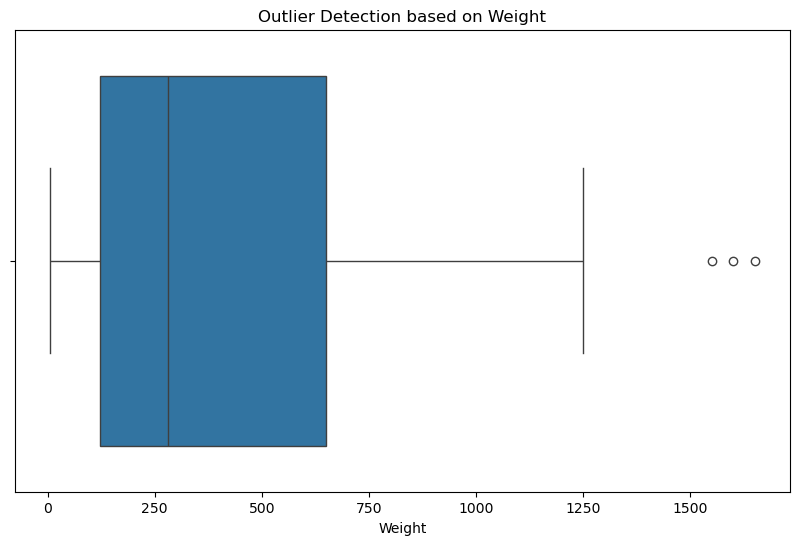

In [82]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')
##Outliers are present in weight

In [88]:
##function to detect outliers using IQR
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [89]:
outlier_detection(df2['Weight'])


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier Detection based on Height')

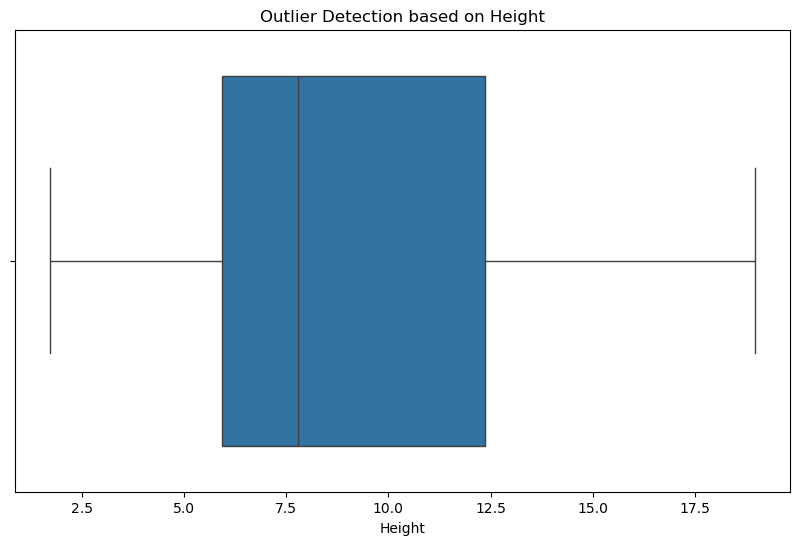

In [87]:
sns.boxplot(x=df2['Height'])
plt.title('Outlier Detection based on Height')


Text(0.5, 1.0, 'Outlier Detection based on Width')

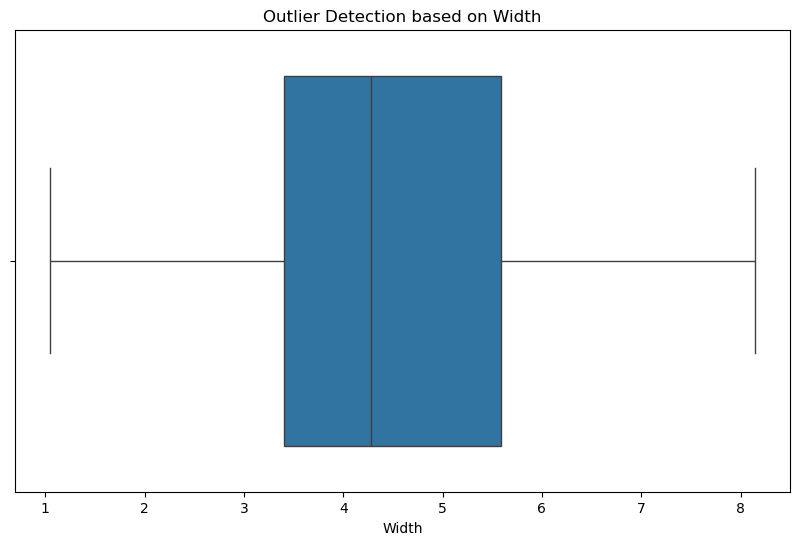

In [95]:
sns.boxplot(x=df2['Width'])
plt.title('Outlier Detection based on Width')


In [93]:
## col 142,143,144 are outliers we have to drop them
df3=df2.drop([142,143,144])
df3.shape

(155, 4)

In [98]:
X = df3[['Height','Width']]
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [100]:
Y=df3[['Weight']]
Y.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [105]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 42) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('Y_train dimension= ', Y_train.shape)
print('Y_train dimension= ', Y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
Y_train dimension=  (124, 1)
Y_train dimension=  (31, 1)


In [117]:
##Create Linear Regression Model
model = LinearRegression()
##Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [126]:
Y_pred = model.predict(X_test)

In [127]:
# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Coefficients: [[ 10.40686081 151.73209963]]
Intercept: [-386.16761436]
Mean Squared Error: 11620.603588644108
R2 Score: 0.8960229976573091
